### Objective 🎯

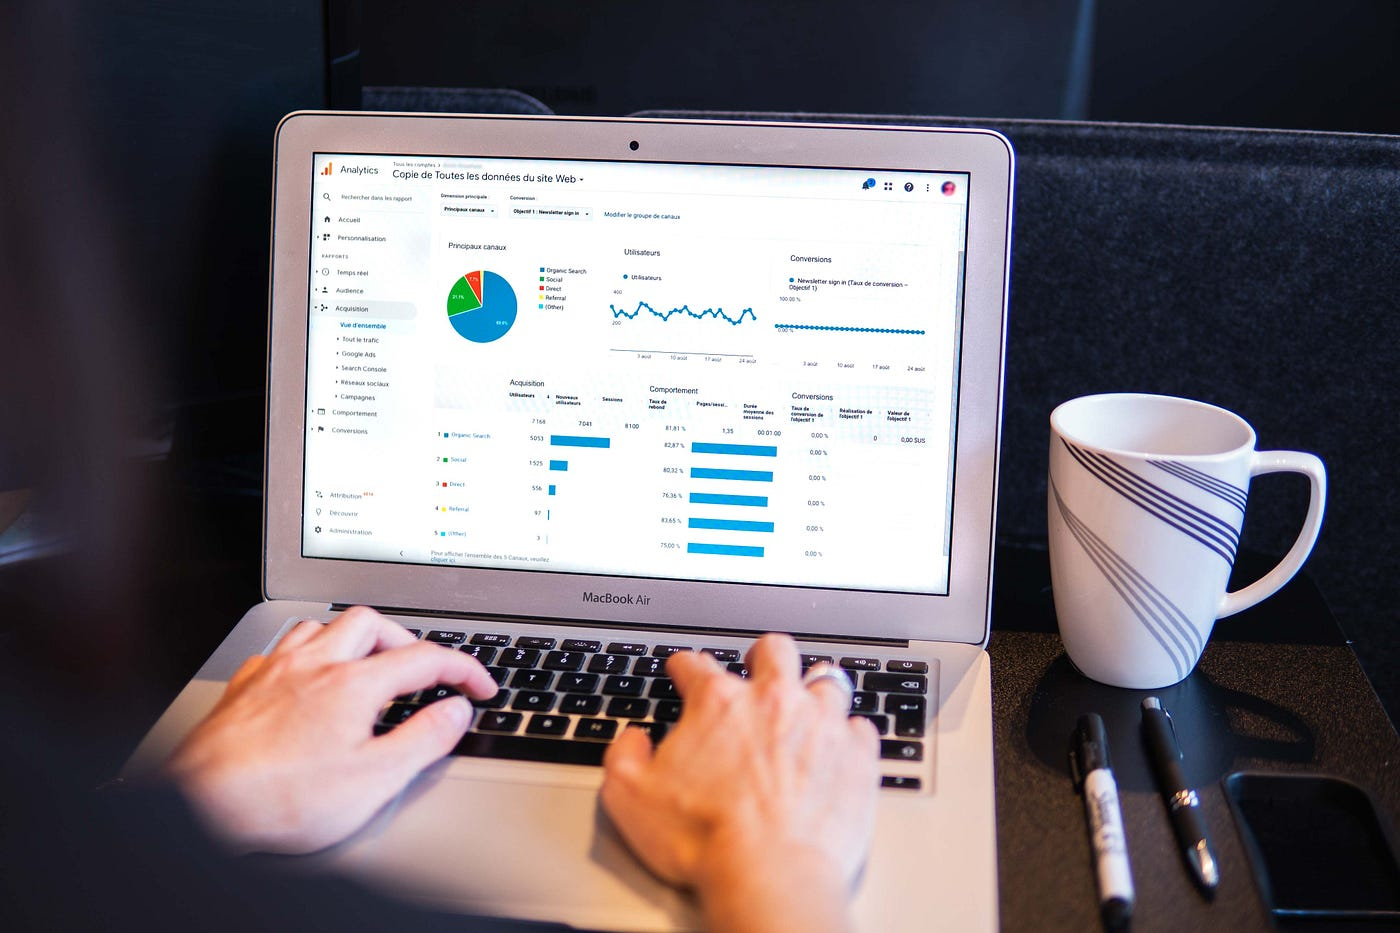
Our project involves predicting laptop prices for users based on their configurations. However, the dataset we have is quite noisy, requiring thorough feature engineering and preprocessing. This complexity adds an interesting challenge to the otherwise seemingly simple task of developing a price prediction model.

### Executive Summary 🧾
In the pursuit of predicting laptop prices for users based on their configurations, our journey took us through a data-driven odyssey that combined art and science. Here's a brief summary of the extensive work i undertook:

- Data Preprocessing: I have provided a dataset of over 1274 rows and 11 columns. This dataset included features such as 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', and our target variable 'Price'.
- Exploratory Data Analysis (EDA): EDA was pivotal in understanding the relationships between input features and their impact on Price.
- Feature Engineering: the dataset we have is quite noisy, requiring thorough feature engineering and preprocessing.This complexity adds an interesting challenge to the otherwise seemingly simple task of developing a price prediction model.
- Model Building: Leveraging machine learning, i built a predictive model for Price Prediction using different regression models like Linear Regression, KNN, Decision Tree Regressor, SVM, Gradient Boost, XGBoost and Random Forest Regressor. Hyperparameter tuning and feature importance analysis helped us optimize the model's performance.

### Introduction 🌟

This report is a journey dedicated to answering the question: How can we predict laptop prices based on their configurations and specific features? We'll leverage our data skills and insights into laptop specifications to guide us through this process. The report will detail the steps taken, insights derived from the data, and the amalgamation of creativity and analytical methods to create a predictive model. Join us on this expedition into the world of laptops, data analysis, and tailored predictions that enhance our understanding of pricing dynamics in the laptop market!

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [3]:
# load dataset
df=  pd.read_csv("D:/practice/laptop_data.csv")

In [4]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


### Data Structure:
We will perform basic statistical analysis to familiarize ourself about general distirbution of data.

In [5]:
categorical_features = [col for col in df.columns if df[col].dtype == "object"]
numeric_features = [col for col in df.columns if df[col].dtype == "int" or df[col].dtype == "float"]
print("Below are the categorical features in our dataset: \n", categorical_features)
print("-"*60)
print("Below are the numeric features in our dataset: \n", numeric_features)
print("-"*60)
print("We have {} Categorical and {} Numeric Features in our data set." .format(len(categorical_features), len(numeric_features)))

Below are the categorical features in our dataset: 
 ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
------------------------------------------------------------
Below are the numeric features in our dataset: 
 ['Inches', 'Price']
------------------------------------------------------------
We have 9 Categorical and 2 Numeric Features in our data set.


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
# Checking for duplicate entries if any
df.duplicated().sum()

0

In [9]:
# checking for null values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [10]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


### Preprocessing
Lets preprocess our data. Clean, transform, and organize our raw data into a format suitable for analysis and modeling.

### Data Cleaning:
- Remove Unnamed Column.
- For column 'Ram' we want its data-type to be int. Remove 'GB' from it and convert its int data-type.
- For column 'Weight' we want its data-type to be float , Remove 'kg' from Weight Column and convert its data-type.

In [11]:
# droping irrelavant columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [12]:
# transform below columns.
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [13]:
# convert data-types
df = df.astype({'Ram' : np.int32,
          'Weight' : np.float64})

In [14]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


All done, our data has been transformed into format alligned with our desire goal.

### Exploratory Data Analysis:
Lets perform some EDA to examining and visualizing data to understand its structure, patterns, and relationships.
We will visualize each feature and extract insights from each one of them.

Histogram
Visualizing Continuous & discrete numeric variables.

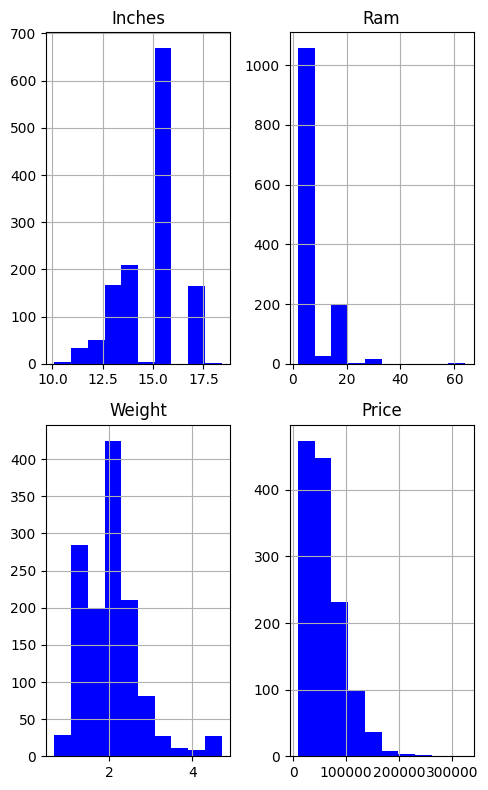

In [16]:
df.hist(figsize=(5,8), color= 'blue')
plt.tight_layout()
plt.show()

### Price (Target Variable)

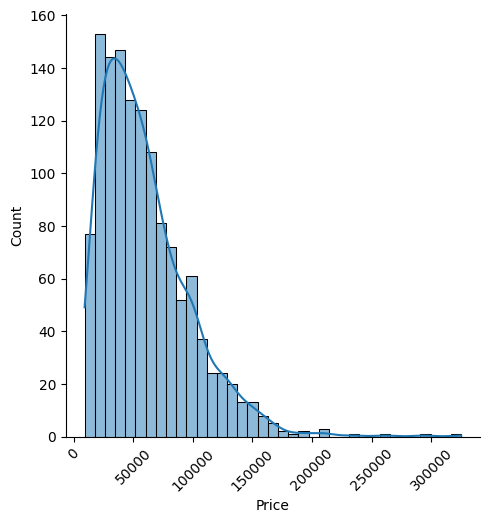

In [17]:
# displot is used to create Univaraite distribution plot(display of single variable)
# it can generate both histogram and kernel density plots
sns.displot(df['Price'], kde = True)
plt.xticks(rotation = 45)
plt.show()

As we can see data is right skewed, tail on the right-hand side of the distribution is longer or fatter than the right-hand side, also Price column have high variance. We will apply transformation to handle this skewness. We will apply log transformation for following reasons:

- We we have right skewed data
- Log transformation stabilize the variance.
- And It also normalizes the distribution and make it more symmetric.

#### Company

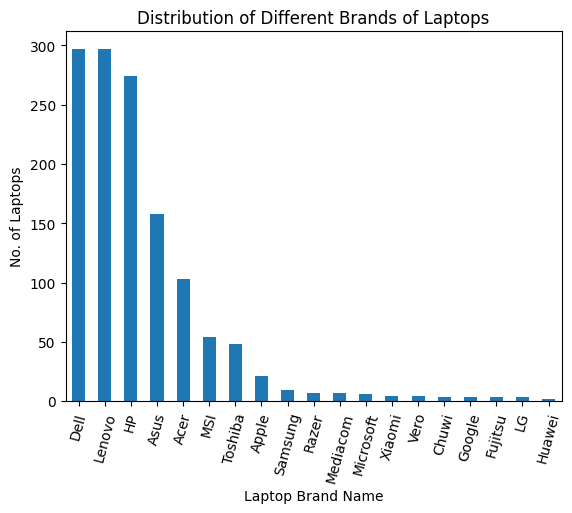

In [18]:
# barplot
df['Company'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 75)
plt.xlabel("Laptop Brand Name", color = 'black')
plt.ylabel("No. of Laptops", color = 'black')
plt.title("Distribution of Different Brands of Laptops")
plt.show()

### What is the prize distribution of different Company brands?

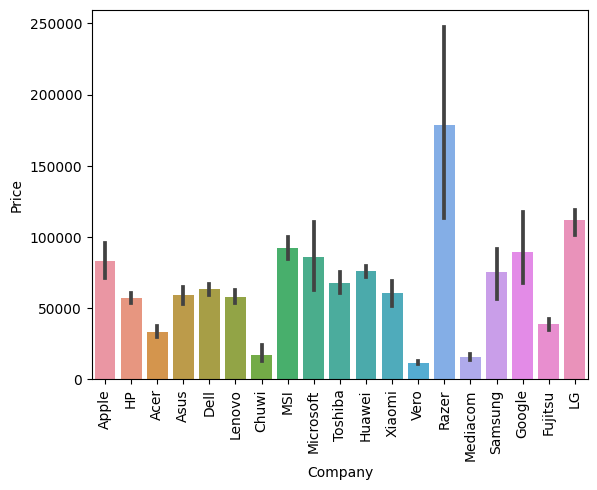

In [19]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### TypeName

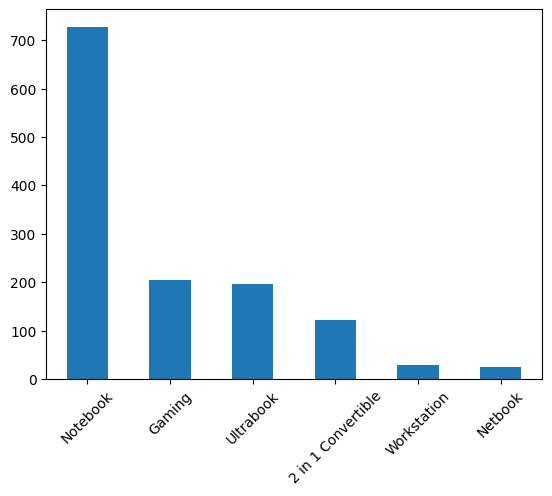

In [20]:
df['TypeName'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

#### What is the Price distribution of each types?

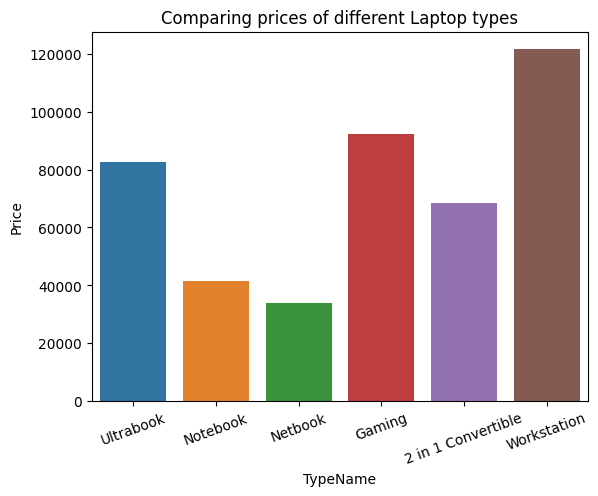

In [21]:
sns.barplot(x = df['TypeName'], y = df['Price'], errorbar=('ci', False))
plt.title("Comparing prices of different Laptop types")
plt.xticks(rotation =20)
plt.show()

### Inches
What is the size(in Inches) of laptop people usually prefer to use?

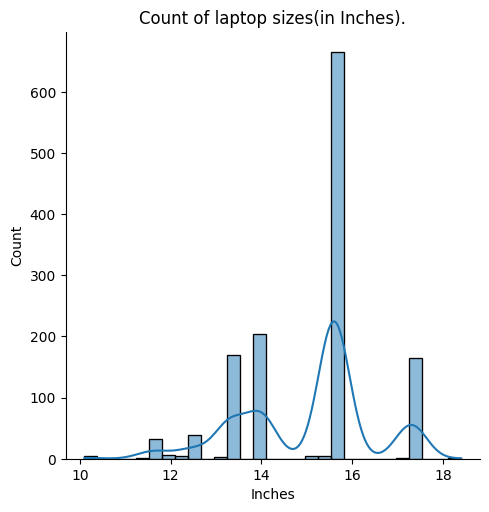

In [22]:
sns.displot(df['Inches'], kde =True)
plt.title("Count of laptop sizes(in Inches).")
plt.show()

The most popular ones that people purchase are 15 Inches Laptop.

I will ascertain is there any linear relationship between Inches and Price.

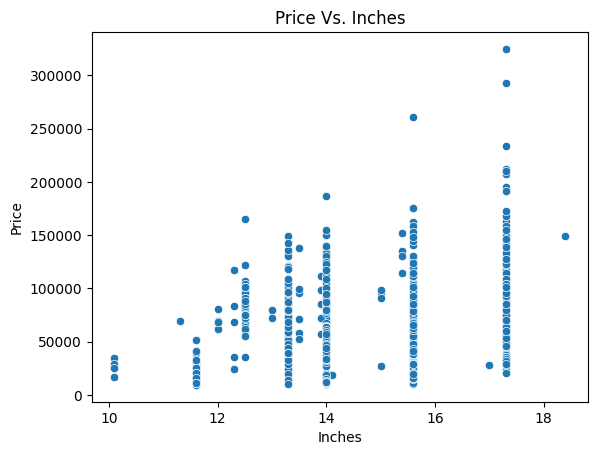

In [23]:
# plotting Scatterplot to see, is there any linear relationship between Price and Inches
sns.scatterplot(x= df['Inches'], y = df['Price'])
plt.title("Price Vs. Inches")
plt.show()

Laptop size have linear relationship with the price, larger the laptop in size higher is the price.

### Screen Resolution

In [24]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Screen Resolution is bit of garbage Data, it comprises of inconsistent data (both alpha-numeric data). From here onwards we will perform some Feature Engineering and extract data that would be relevant to our analysis.

### Feature Engineering:
We will perform some feature engineering, as can see from above there is alot of data is enclosed in "ScreenResolution" column such as "Touchscreen", "IPS Panel", we can play around them and check how these factors influence our target(price) variable.

1. Touchscreen
We will create new column "Touchscreen" that will give us binary output i.e.

- "1" if Touchscreen
- "0" if no Touchscreen

In [25]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

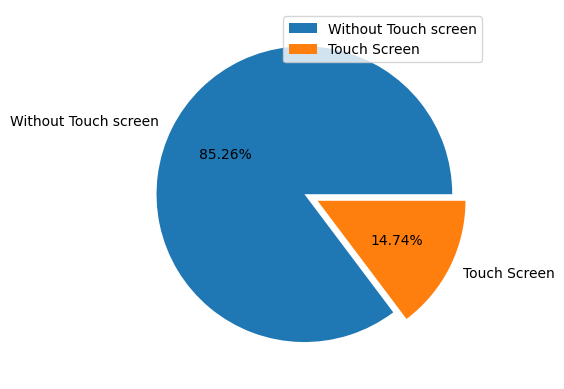

In [26]:
# Pie Plot
plt.pie(df['Touchscreen'].value_counts(), autopct= "%.2f%%", explode= [0.0, 0.1], labels= ['Without Touch screen', 'Touch Screen'])
plt.legend()
plt.show();

#### Do people prefer to purchase Laptops with touchscreens?

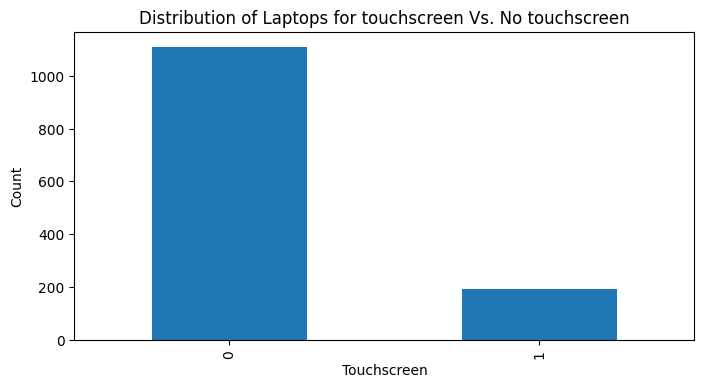

In [27]:
plt.figure(figsize=(8,4))
df['Touchscreen'].value_counts().plot(kind= 'bar')
plt.title("Distribution of Laptops for touchscreen Vs. No touchscreen")
plt.xlabel("Touchscreen")
plt.ylabel("Count")
plt.show()

People prefer Laptops without touchscreen, there is huge gap between people who use touchscreen and those doesn't.
Is price is the reason that people opt for laptops without touchscreens?
Will find that answer below.

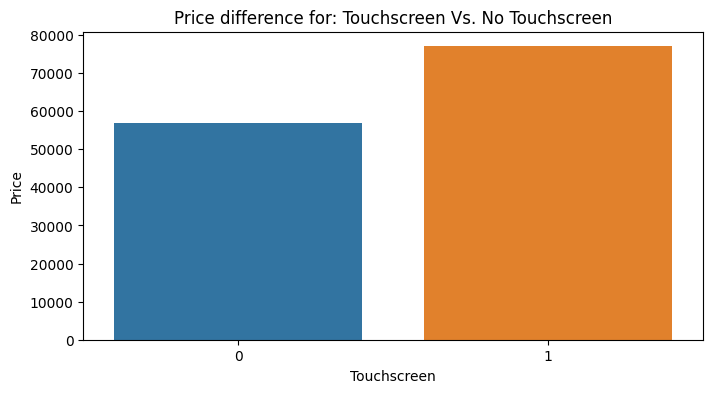

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(x= df['Touchscreen'], y= df['Price'], errorbar= ('ci', False))
plt.title("Price difference for: Touchscreen Vs. No Touchscreen")
plt.show()

We can clearly see on average Laptops with Touchscreen have higher prices than the other ones. Might be this is the reason people opt for laptops without touch.

### ScreenResolution
Upon analyzing the 'Touchscreen' column, we can see alot of laptops that have IPS panel in it. we will create a separate column for laptops with IPS panels and will see the impact of such laptops.

In [29]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [30]:
df['Ips Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [31]:
df['Ips Panel'].value_counts()

0    938
1    365
Name: Ips Panel, dtype: int64

<AxesSubplot: >

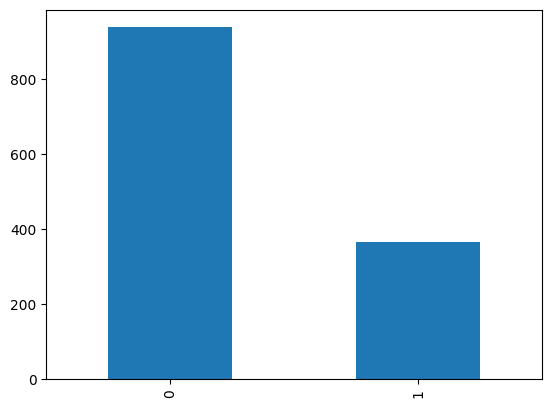

In [32]:
df['Ips Panel'].value_counts().plot(kind='bar')

### Does Laptops with IPS panel have any influence on price?

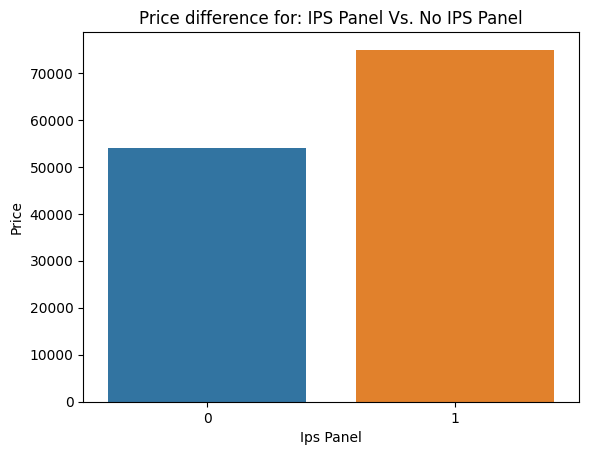

In [33]:
# sns.barplot(x=df['Ips'],y=df['Price'])
# Avg price
sns.barplot(x= df['Ips Panel'], y=df['Price'], errorbar= ('ci', False))
plt.title("Price difference for: IPS Panel Vs. No IPS Panel")
plt.show()

#### X_Resolution and Y_Resolution

Extract X_resolution and Y_resolution from "ScreenResolution" Column.

In [34]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [35]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [36]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

Out of X_resolution and Y_resolution column we will construct a new colum ppi(pixel per inches). PPI is a metric that describes the pixel density of display screen. Higher PPI means higher pixel density and more detailed image.

So this feature will be important factor in predicting the price of laptop.

In [38]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [39]:
df.corr()['Price']

C:\Users\hp\AppData\Local\Temp\ipykernel_5040\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips Panel      0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [40]:
# ScreenResolution Column is no need any more.
df.drop(columns=['ScreenResolution'],inplace=True)

In [41]:
# likewise Inches, x_res, y_res
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [42]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips Panel,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


### Cpu:
Next feature we have to take care of Cpu.

In [43]:
print("Total number of unique CPU processors in our data set: {}" .format(len(df['Cpu'].value_counts())))
print("-"*60)
df['Cpu'].value_counts()

Total number of unique CPU processors in our data set: 118
------------------------------------------------------------


Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
# Extract new feature out of cpu.
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
print("Total number of unique CPU brands in our data set: {}" .format(len(df['Cpu Name'].value_counts())))
print("-"*50)
df['Cpu Name'].value_counts()

Total number of unique CPU brands in our data set: 40
--------------------------------------------------


Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

We have total 40 unique laptop brands, we will built a function to deduce categorical data in "Cpu_name" column to maximum of five. i.e.:

- Intel Core i7
- Intel Core i5
- Intel core i3
- Other Intel Processor
- AMD processor

In [46]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [47]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [48]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips Panel,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5


### Which CPU brands are popular among people?
We will plot a graph to see which brand people prefer.

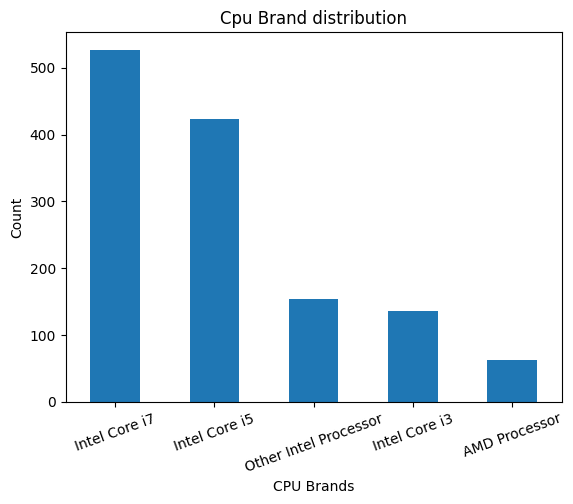

In [49]:
# df['Cpu brand'].value_counts().plot(kind='bar')
df['Cpu brand'].value_counts().plot(kind = 'bar')
plt.xlabel("CPU Brands")
plt.ylabel("Count")
plt.title("Cpu Brand distribution")
plt.xticks(rotation =20)
plt.show();

### Is there any Price difference for CPU brands??

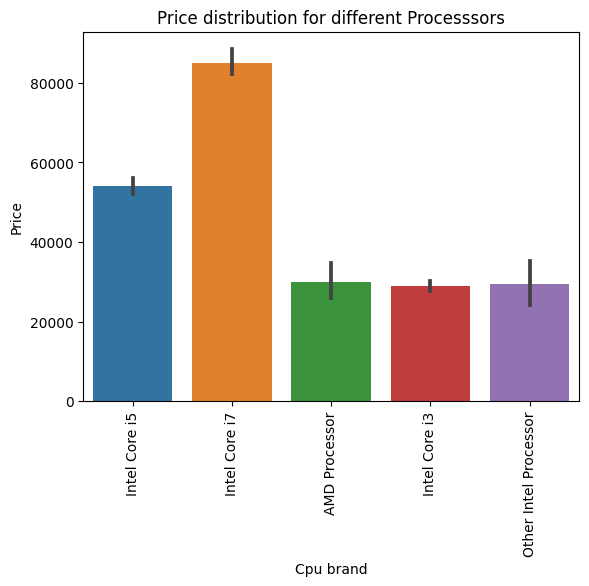

In [50]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.title("Price distribution for different Processsors")
plt.xticks(rotation='vertical')
plt.show()

The most expensive processor among given processors is "Intel Core i7", the average price of Intel Core i7 is maxium as compared to the other processors

In [51]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [52]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'Ips Panel', 'ppi', 'Cpu brand'],
      dtype='object')

We have extracted our desired information from CPU and CPU_name column and are not relevant to our analysis any further, so will drop them

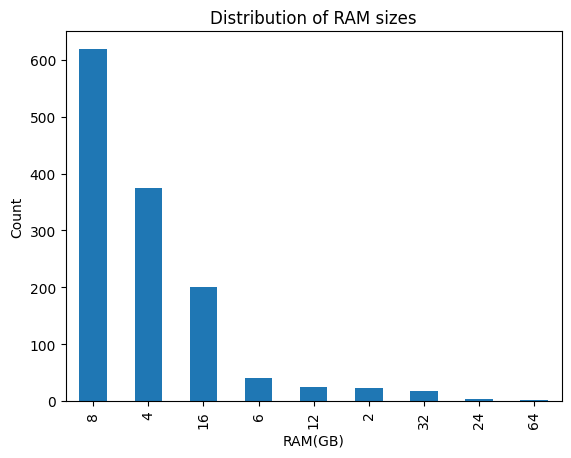

In [53]:
# Ram
df['Ram'].value_counts().plot(kind= 'bar')
plt.xlabel("RAM(GB)")
plt.ylabel("Count")
plt.title("Distribution of RAM sizes")
plt.show()

As we can see most popular ram that people love to purchases is 8 GB, followed 4GB, 16GB, 6GB..

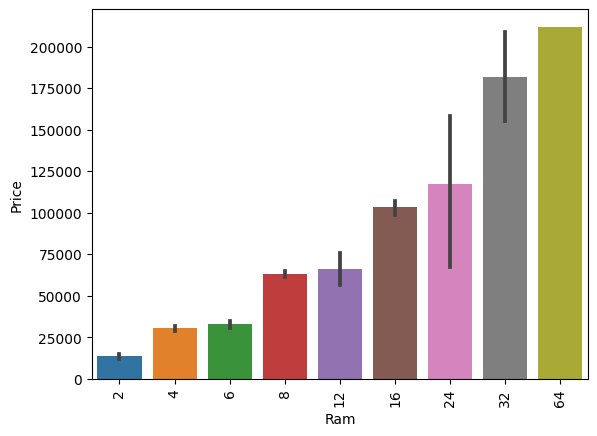

In [54]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

If we look at the price distributions most expensive one is 64, 32, 24, .... This is linear relationship as Ram capacity Increases Price also Increases.

In [55]:
# Next column to be taken care of: Memory Column
print("Number of unique memory names in data set : {}" .format(len(df['Memory'].value_counts())))
print("-"*20)
df['Memory'].value_counts()

Number of unique memory names in data set : 39
--------------------


256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Above is more of gibberish data need to transform it: it contains wide range of categories of data, we will converge data into maxium of four categories. We will further split this column into 4 columns.

- HDD
- SSD
- Flash Storage
- Hybrid

In [56]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5040\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\hp\AppData\Local\Temp\ipykernel_5040\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [57]:
df.sample()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips Panel,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1117,Razer,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12,1,0,352.465147,Intel Core i7,0,256,0,0


In [58]:
# drop memory column
df.drop(columns=['Memory'],inplace=True)

In [59]:
# drop Hybrid and Flash_Storage
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [60]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips Panel,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


### Gpu:
The next column to be taken care of: Gpu column

In [61]:
print("Number of unique GPUs in data set: {}" .format(len(df['Gpu'].value_counts())))
print("-"*20)
df['Gpu'].value_counts()

Number of unique GPUs in data set: 110
--------------------


Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

We can see above too many categories(110 of them), not much of data that could be of our use except brand name, if there was more info such as: memory etc.. we could have extracted it but not such info that could be of our use.

In [62]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [63]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

We have just 1 card by brand name "ARM", will drop it because it will not make much of sense.

In [64]:
df = df[df['Gpu brand'] != 'ARM']

In [65]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

### Does GPU brand have any influence on price of laptop?

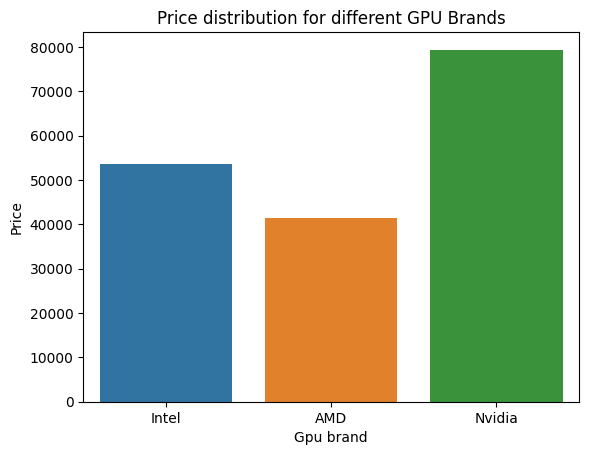

In [66]:
sns.barplot(x= df['Gpu brand'], y= df['Price'], errorbar=('ci', False), estimator=np.mean)
plt.title("Price distribution for different GPU Brands")
plt.show()

In [67]:
# drop Gpu column
df.drop(columns=['Gpu'],inplace=True)

In [68]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

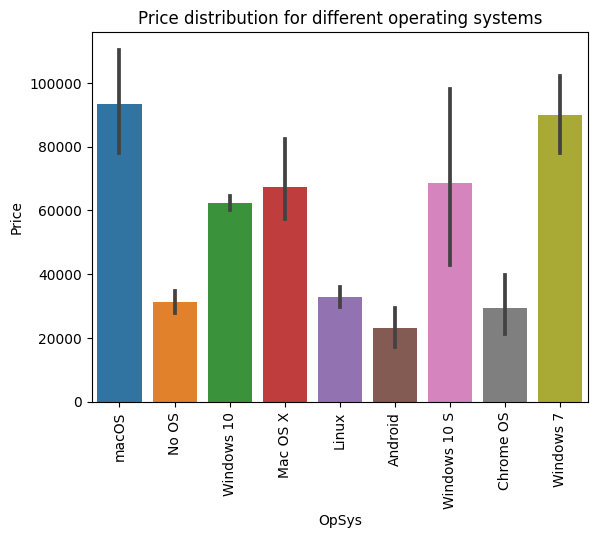

In [69]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.title("Price distribution for different operating systems")
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df['OpSys'].value_counts(ascending=False)

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

We will reduce the categories into maximum of three:

- For all Windows operating systems into "Windows"
- For all Mac operating systems into "Mac"
- For Linux/Android into "Others/Linux/No OS"

In [71]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [72]:
df['os'] = df['OpSys'].apply(cat_os)

In [73]:
# df.head()

In [74]:
# Drop Opsys
df.drop(columns=['OpSys'],inplace=True)

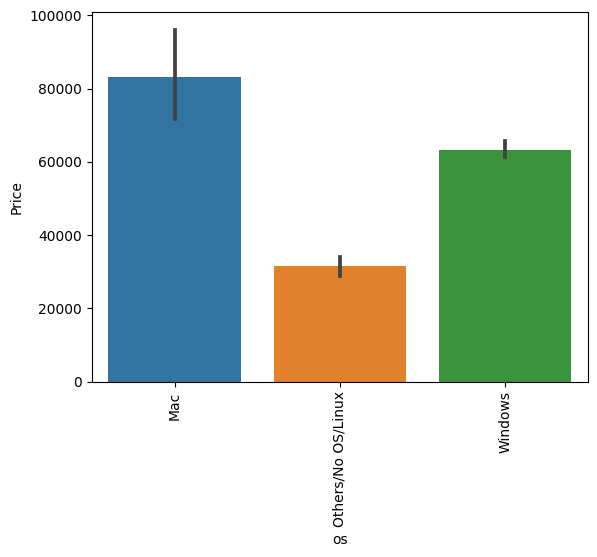

In [75]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5040\182618688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'], kde = True)


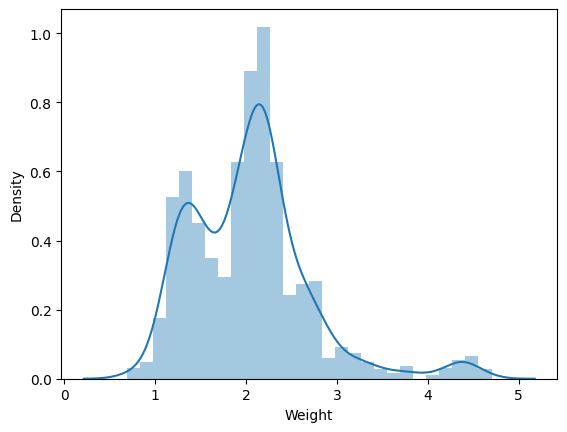

In [76]:
sns.distplot(df['Weight'], kde = True)
plt.show();

Graph is Bimodal; we can see two peaks/spikes in frequencies.

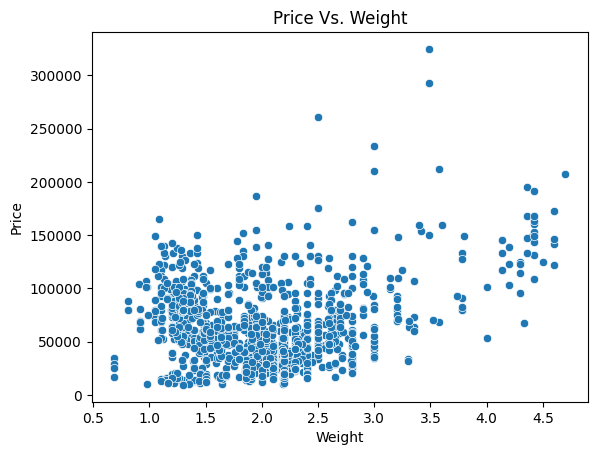

In [77]:
#Will see is there any linear relationship between "Weight" and "Price" 
sns.scatterplot(x= df['Weight'], y = df['Price'])
plt.title("Price Vs. Weight")
plt.show()

We can see sort of week Linear relationship, with increase in price a little bit of Price also Increases.

In [78]:
df.corr()['Price']

C:\Users\hp\AppData\Local\Temp\ipykernel_5040\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips Panel      0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

Yeah, it is quite evident Weight have weak relationship with Price.

### Heatmap
Plotting Heatmap: Will analyze the whole matrix, this will give us more of sense how other columns are correlated with each other.

C:\Users\hp\AppData\Local\Temp\ipykernel_5040\2536497396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='0.2f')


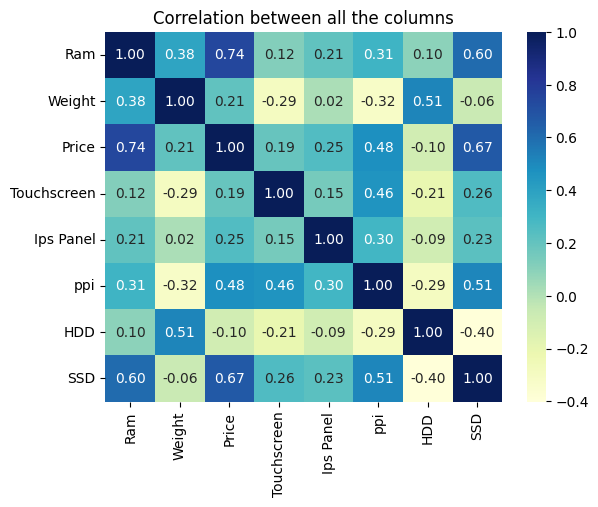

In [79]:
# sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='0.2f')
plt.title("Correlation between all the columns")
plt.show();

### Last task: Target Column
As we have noted bofore our target column is skwed.This can make it difficult for machine learning algorithms to learn effectively from the data. Log Transformation helps to reduce the effect of extreme values and makes the distribution more symmetric.

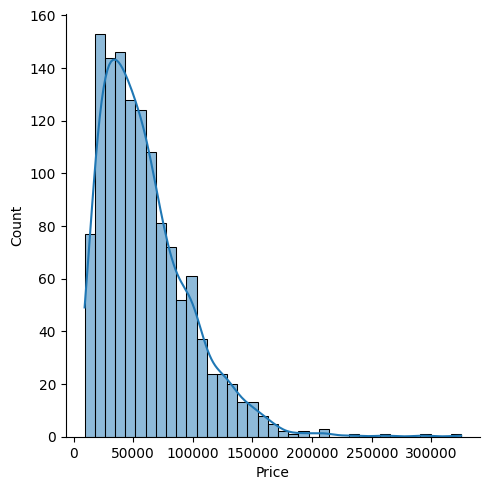

In [80]:
sns.displot(df['Price'], kde = True)
plt.show()

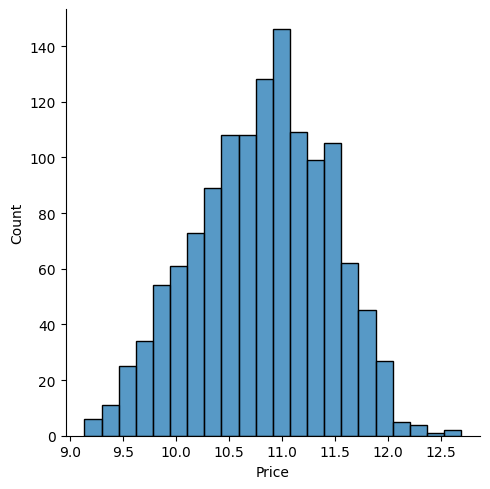

In [81]:
# sns.distplot(np.log(df['Price']))
# Applying log transformation will have following effect
sns.displot(np.log(df['Price']))
plt.show()

#### Building Machine Learning Models

In [82]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [83]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [84]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [86]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [88]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [89]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips Panel    1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418644
MAE 0.2101782797642883


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Linear regression

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418644
MAE 0.2101782797642883


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Ridge Regression

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8127331031311809
MAE 0.20926802242582976


### Lasso Regression

In [94]:
df.shape

(1302, 13)

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### KNN

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.803148868705085
MAE 0.19264883332948868


### Decision Tree

In [97]:
step1 = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
                                       ], remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth= 8)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("R2 score", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))

R2 score 0.8353778314733835
MAE 0.1841630096012685


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### SVM

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8083180902283282
MAE 0.2023905942725167


### Random Forest

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8873402378382488
MAE 0.15860130110457718


### ExtraTrees

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8753793123440623
MAE 0.15979519126758127


### AdaBoost

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7928604562382432
MAE 0.229128349313482


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Gradient Boost

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8831508827803854
MAE 0.1592467762072876


### XgBoost

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811773435850243
MAE 0.16496203512600974


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Voting Regressor

In [104]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')


# rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
# et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

# step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

### Stacking

In [105]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8804581652071268
MAE 0.16718230791227173


### Exporting the Model

In [106]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))